SyntaxError: invalid syntax (519300778.py, line 1)

In [4]:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, ElasticNet,LogisticRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [3]:
from google.colab import files
 
 
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [10]:

df = pd.read_csv('Cleaned.csv')
df.shape
df.head
df.info
df.describe

<bound method NDFrame.describe of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India        1/5/2019   Kolkata    Banglore   
2      Jet Airways        9/6/2019     Delhi      Cochin   
3           IndiGo       12/5/2019   Kolkata    Banglore   
4           IndiGo        1/3/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10677     Air Asia        9/4/2019   Kolkata    Banglore   
10678    Air India      27/04/2019   Kolkata    Banglore   
10679  Jet Airways      27/04/2019  Banglore       Delhi   
10680      Vistara        1/3/2019  Banglore   New Delhi   
10681    Air India        9/5/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration  Total_Stops  \
0                  BLR → DEL    22:20         1:10     2:50            0   
1      CCU → IXR → BBI → BLR     5:50        13:15     7:25            2   
2      DEL → LKO 

<Axes: >

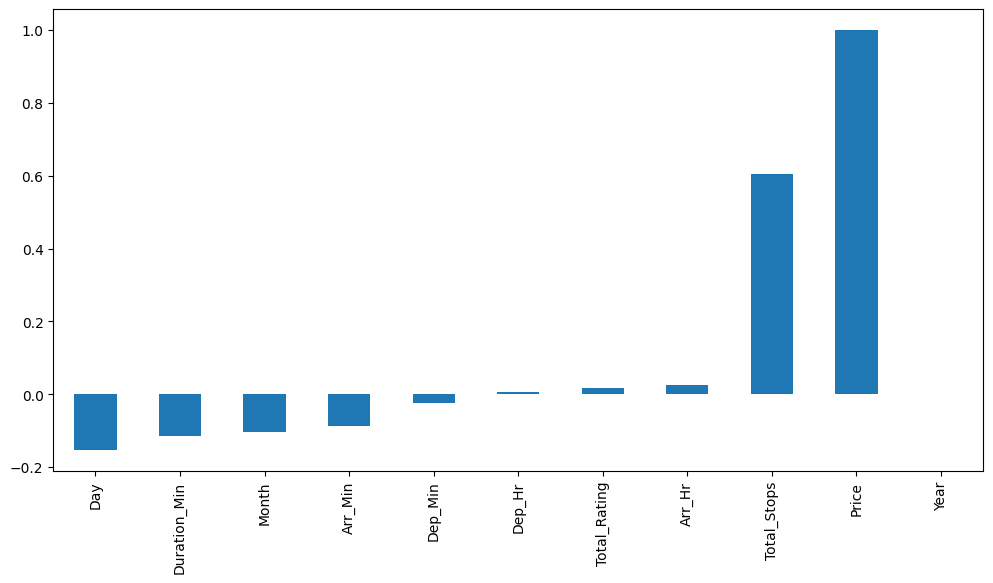

In [7]:
plt.figure(figsize=(12,6))
df.corr()['Price'].sort_values().plot(kind='bar')

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(df['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

ValueError: could not convert string to float: 'IndiGo'

<Figure size 1200x600 with 0 Axes>

In [9]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Airline'], df['Price'], palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

TypeError: boxenplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1200x600 with 0 Axes>

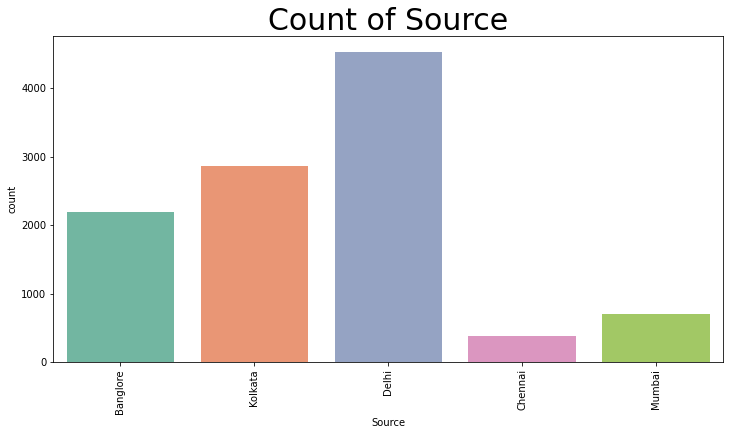

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

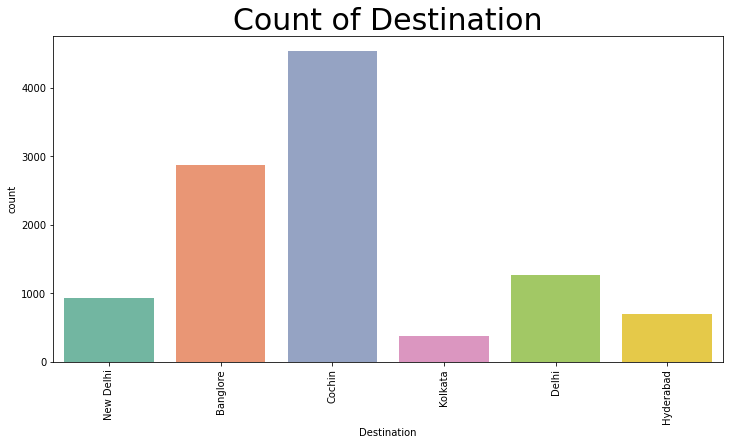

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df['Destination'], palette='Set2')
plt.title('Count of Destination', size=30)
plt.xticks(rotation=90)
plt.show()

In [12]:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Source'], df['Price'], palette='Set3')
plt.title('Airlines vs Source', size=30)
plt.xticks(rotation=90)
plt.show()

TypeError: boxenplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1200x600 with 0 Axes>

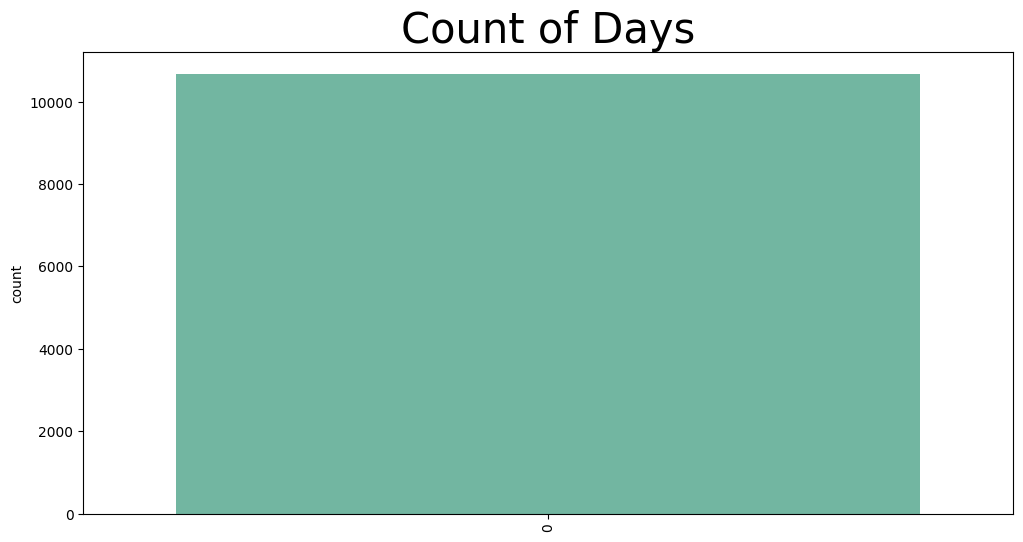

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(df['Day'], palette='Set2')
plt.title('Count of Days', size=30)
plt.xticks(rotation=90)
plt.show()

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(df['Day'], df['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1200x600 with 0 Axes>

In [15]:
df['Month'] = df['Month'].map({
    1:'JAN',
    2:'FEB',
    3:'MAR',
    4:'APR',
    5:'MAY',
    6:'JUN',
    7:'JUL',
    8:'AUG',
    9:'SEP',
    10:'OCT',
    11:'NOV',
    12:'DEC'
})

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(df['Month'], df['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1200x600 with 0 Axes>

In [17]:
df['Duration_Hr'],_ = df['Duration_Hr'].str.split('h',1).str

In [18]:
df['Duration_Hr'] = df['Duration_Hr'].astype(int)

In [19]:
df['Duration_bool'] = (df['Duration_Hr']*60)+df['Duration_Min']

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Duration_bool'], df['Price'], palette='Set2')
plt.title('Duration vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1200x600 with 0 Axes>

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(df['Total_Stops'], df['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1200x600 with 0 Axes>

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(df['Additional_Info'], df['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 1200x600 with 0 Axes>

In [23]:
ncol=["Duration_bool"]          
for i in ncol:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    df = df.drop(df[df.loc[:,i] <= min].index)
    df = df.drop(df[df.loc[:,i] >= max].index)

In [24]:
df = df.dropna()
df.to_csv('Final.csv', index=None)

In [25]:
df = pd.read_csv('Final.csv')
df.shape

(9650, 22)

In [26]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min,Total_Rating,Duration_bool
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,1:10,2:50,0,No Info,3897,24,MAR,2019,22,20,1,10,2,50.0,7,170.0
1,Air India,1/5/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7:25,2,No Info,7662,1,MAY,2019,5,50,13,15,7,25.0,2,445.0


In [27]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Year', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Duration_Hr', 'Duration_Min', 'Total_Rating',
       'Duration_bool'],
      dtype='object')

In [28]:
df1 = df[['Airline', 'Source', 'Destination', 'Total_Stops',
         'Additional_Info', 'Price', 'Day', 'Month', 'Duration_bool']]
df1.shape

(9650, 9)

In [29]:
df1.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Duration_bool
0,IndiGo,Banglore,New Delhi,0,No Info,3897,24,MAR,170.0
1,Air India,Kolkata,Banglore,2,No Info,7662,1,MAY,445.0
2,IndiGo,Kolkata,Banglore,1,No Info,6218,12,MAY,325.0
3,IndiGo,Banglore,New Delhi,1,No Info,13302,1,MAR,285.0
4,SpiceJet,Kolkata,Banglore,0,No Info,3873,24,JUN,145.0


In [30]:
df1 = df1.rename(columns={'Duration_bool': 'Duration'})

In [31]:
df1.isnull().any().any()

False

In [32]:
df1['Month'] = df1['Month'].map({
    'JAN':1,
    'FEB':2,
    'MAR':3,
    'APR':4,
    'MAY':5,
    'JUN':6,
    'JUL':7,
    'AUG':8,
    'SEP':9,
    'OCT':10,
    'NOV':11,
    'DEC':12
})

In [33]:
df1['Additional_Info'] = df1['Additional_Info'].map({
    'No Info':0, 
    'In-flight meal not included':1,
    'No check-in baggage included':2,
    '1 Short layover':3,
    '1 Long layover':4,
    'Change airports':5,
    'Business class':6,
    'Red-eye flight':7,
    '2 Long layover':8
})

In [34]:
dummies = pd.get_dummies(df1[['Airline', 'Source', 'Destination']])

In [35]:
df2 = pd.concat([df1,dummies], axis=1)
df2.shape

(9650, 32)

In [36]:
df2 = df2.drop(['Airline', 'Source', 'Destination'], axis=1)
df2.shape

(9650, 29)

In [37]:
df2.head()

,Total_Stops,Additional_Info,Price,Day,Month,Duration,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,3897,24,3,170.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,0,7662,1,5,445.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,0,6218,12,5,325.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1,0,13302,1,3,285.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,3873,24,6,145.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [38]:
df2.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Day', 'Month', 'Duration',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [39]:
df2['Additional_Info'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [40]:
X = df2.drop('Price', axis=1)
y = df2['Price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6755, 28), (2895, 28), (6755,), (2895,))

In [42]:
models = [['LinearRegression : ', LinearRegression()],
          ['ElasticNet :', ElasticNet()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['SVR : ', SVR()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['ExtraTreeRegressor : ', ExtraTreeRegressor()],
          ['XGBRegressor : ', XGBRegressor()]]

In [43]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))),(r2_score(y_test, predictions)))

LinearRegression :  2782.7502366165495 0.6271463315444201
ElasticNet : 3374.6297373093057 0.4516697289841164
DecisionTreeRegressor :  2080.584779045164 0.7915697268425024
RandomForestRegressor :  1666.9282998384108 0.8662099539400849
SVR :  4246.460018470376 0.13175149818495924
GradientBoostingRegressor :  1909.0718858474636 0.8245172111797752
ExtraTreeRegressor :  2213.1913418829254 0.7641543399951858
XGBRegressor :  1578.3512327934027 0.8800508233275828


In [44]:
algorithms = {
    'XGBRegressor' : {
        'model' : XGBRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'gamma' : [0.1,0.2, 0.3, 0.4, 0.5],
            'min_child_weight' : [1, 3, 5, 7, 9],
            'colsample_bytree' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30]
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']
        }
    }
}

In [45]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 2, n_jobs=-1, verbose=3)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [46]:
final = pd.DataFrame(score, columns=['model', 'score', 'params'])
final

,model,score,params
0,XGBRegressor,0.851870,"{'min_child_weight': 1, 'max_depth': 7, 'learn..."
1,RandomForestRegressor,0.843731,"{'n_estimators': 300, 'min_samples_split': 2, ..."
2,GradientBoostingRegressor,0.841654,"{'n_estimators': 700, 'learning_rate': 0.1, 'c..."


In [47]:
final['params'][2]

{'n_estimators': 700, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}

In [ ]:
regressor = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.3, criterion = 'friedman_mse')
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_test, prediction))))

RMSE : 1625.0935228123083


In [ ]:
regressor.score(X_train, y_train), regressor.score(X_test, y_test)

(0.9169577616559885, 0.8728411234197946)

In [ ]:
s=predictions[0:]
print(s)
len(s)

[ 4633.54    3896.2412 13071.397  ... 11912.418  13829.854   9989.046 ]


2895

In [48]:
df2['Price'][0]

# from google.colab import files
 
 
# uploaded = files.upload()
# existing_csv['Price'] = k
# existing_csv.to_csv('updated_file.csv', index=False)


3897

In [ ]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 867.898068674776
MSE: 2491192.614060454
RMSE: 1578.3512327934027


In [49]:
import pickle
file = open('final_model.pkl', 'wb')
pickle.dump(regressor, file)

NameError: name 'regressor' is not defined

In [50]:


import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
new=pd.read_csv("Final.csv")
new['Date_of_Journey']
new.tail()
len(new)
# new["Price"]=s
# new.to_csv('m.csv', index=False)
# new.head()

9650

In [ ]:
df1.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Day', 'Month', 'Duration'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          9650 non-null   object 
 1   Source           9650 non-null   object 
 2   Destination      9650 non-null   object 
 3   Total_Stops      9650 non-null   int64  
 4   Additional_Info  9650 non-null   int64  
 5   Price            9650 non-null   int64  
 6   Day              9650 non-null   int64  
 7   Month            9650 non-null   int64  
 8   Duration         9650 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 678.6+ KB


In [ ]:
df1['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Final.csv to Final (2).csv


In [ ]:
# # Import necessary libraries
# import pandas as pd


# # Load dataset
# df = pd.read_csv('n.csv')

# # Get user input for source, destination, date of journey, and minimum rating
# print("Source airports: ", df['Source'].unique())
# source = input("Enter the source airport code: ")
# print("Destination airports: ", df['Destination'].unique())
# destination = input("Enter the destination airport code: ")
# date = parse(date_str).date()
# rating = float(input("Enter the minimum rating you want: "))
# # date = input("Enter the date of journey (YYYY-MM-DD): ")
# # rating = float(input("Enter the minimum rating you want: "))

# # Filter the data based on user input
# filtered_df = df[(df['Source'] == source) & (df['Destination'] == destination) & (df['Total_Rating'] >= rating)]

# if filtered_df.empty:
#     print("No flights found matching your requirements.")
# else:
#     # Sort the filtered data by price
    
#     sorted_df = filtered_df.sort_values(by=['Price', 'Total_Rating'], ascending=[True, False])



#     # Print the top 5 recommendations
#     print("Here are the top 5 flight recommendations:")
#     for i in range(5):
#         airline = sorted_df.iloc[i]['Airline']
#         price = sorted_df.iloc[i]['Price']
#         flight_date = sorted_df.iloc[i]['Date_of_Journey']
#         flight_rating = sorted_df.iloc[i]['Total_Rating']
#         print(f"Airline: {airline} | Price: {price} | Date: {flight_date} | Rating: {flight_rating}")

# import pandas as pd
# from dateutil.parser import parse

# # Load dataset
# df = pd.read_csv('n.csv')

# # Get user input for source, destination, date, and rating
# source = input("Enter the source airport code: ")
# print("Source airports: ", df['Source'].unique())
# destination = input("Enter the destination airport code: ")
# print("Source airports: ", df['Destination'].unique())

# # Filter the data based on source and destination
# filtered_df = df[(df['Source'] == source) & (df['Destination'] == destination)]

# if filtered_df.empty:
#     print("No flights found with the given source and destination.")
# else:
#     # Show the available dates of flights
#     available_dates = filtered_df['Date_of_Journey'].unique()
#     print("Available dates of flights:")
#     for date in available_dates:
#         print(date)

#     # Get user input for date and rating
#     date_str = input("Enter the date of journey (in any format): ")
#     date = parse(date_str).date()
#     # rating = float(input("Enter the minimum rating you want: "))

#     # Filter the data based on user input
#     filtered_df = filtered_df[(pd.to_datetime(filtered_df['Date_of_Journey']).dt.date == date) & (filtered_df['Total_Rating'] >= rating)]

#     # Sort the filtered data by price (low to high) and rating (high to low)
#     sorted_df = filtered_df.sort_values(by=['Price', 'Total_Rating','Date_of_Journey'], ascending=[True, False,True])

#     if sorted_df.empty:
#         print("No flights found with the given requirements.")
#     else:
#         # Print the top 5 recommendations
#         print("Top 5 recommendations:")
#         for index, row in sorted_df.head(5).iterrows():
#             print(f"{row['Airline']} - Date: {row['Date_of_Journey']}, Price: {row['Price']}, Rating: {row['Total_Rating']}")
import pandas as pd
from dateutil.parser import parse

# Load dataset
df = pd.read_csv('Final.csv')

# Get user input for source, destination, date, and rating
print("Source airports: ", df['Source'].unique())
source = input("Enter the source airport code: ")
print("Destination airports: ", df['Destination'].unique())
destination = input("Enter the destination airport code: ")
rating=int(input())


# Filter the data based on source and destination
filtered_df = df[(df['Source'] == source) & (df['Destination'] == destination)]

if filtered_df.empty:
    print("No flights found with the given source and destination.")
else:
    # Show the available dates of flights
    available_dates = filtered_df['Date_of_Journey'].unique()
    print("Available dates of flights:")
    for date in sorted(available_dates, key=lambda x: parse(x).month):
        print(date)

    # Get user input for date and rating
    date_str = input("Enter the date of journey (in any format): ")
    date = parse(date_str).date()
    # rating = float(input("Enter the minimum rating you want: "))

    # Filter the data based on user input
    filtered_df = filtered_df[(pd.to_datetime(filtered_df['Date_of_Journey']).dt.date == date) & (filtered_df['Total_Rating'] >= rating)]

    # Sort the filtered data by price (low to high) and rating (high to low)
    sorted_df = filtered_df.sort_values(by=['Price', 'Total_Rating'], ascending=[True, False])

    if sorted_df.empty:
        print("No flights found with the given requirements.")
    else:
        # Print the top 5 recommendations
        print("Top 5 recommendations:")
        low_cost_df = sorted_df.sort_values(by='Price')
        for index, row in low_cost_df.head(5).iterrows():
            print(f"{row['Airline']} - Date: {row['Date_of_Journey']}, Price: {row['Price']}, Rating: {row['Total_Rating']}")


Source airports:  ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Enter the source airport code: Delhi
Destination airports:  ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Enter the destination airport code: Cochin
10
Available dates of flights:
1/6/2019
1/3/2019
1/5/2019
1/4/2019
3/3/2019
3/6/2019
3/4/2019
27/03/2019
21/03/2019
15/03/2019
18/03/2019
24/03/2019
15/04/2019
18/04/2019
24/04/2019
21/04/2019
27/04/2019
27/05/2019
15/05/2019
18/05/2019
21/05/2019
24/05/2019
6/3/2019
27/06/2019
6/5/2019
24/06/2019
15/06/2019
6/6/2019
18/06/2019
6/4/2019
21/06/2019
9/6/2019
9/3/2019
9/5/2019
9/4/2019
12/6/2019
12/5/2019
Enter the date of journey (in any format): 6/4/2019
Top 5 recommendations:
Air India - Date: 6/4/2019, Price: 4487, Rating: 10
Air India - Date: 6/4/2019, Price: 4729, Rating: 10
IndiGo - Date: 6/4/2019, Price: 5073, Rating: 10
GoAir - Date: 6/4/2019, Price: 5135, Rating: 10
Air India - Date: 6/4/2019, Price: 5232, Rating: 10


In [ ]:
df1['Airline']


0          IndiGo
1       Air India
2          IndiGo
3          IndiGo
4        SpiceJet
          ...    
9645     SpiceJet
9646     Air Asia
9647    Air India
9648      Vistara
9649    Air India
Name: Airline, Length: 9650, dtype: object